# Pre-processing
### 1. Reading the Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load all files
df = pd.read_csv("PostLAEI2013_2013_NO2.csv")
df1 = pd.read_csv("PostLAEI2013_2013_NOx.csv")
df2 = pd.read_csv("PostLAEI2013_2013_PM10.csv")
df3 = pd.read_csv("PostLAEI2013_2013_PM10d.csv")
df4 = pd.read_csv("PostLAEI2013_2013_PM25.csv")
df.drop(['year'], axis=1, inplace=True)

In [3]:
# Appending the arrays to df 
df['NOx'] = df1['conct']
df["PM10"] = df2['conct']
df["PM10d"] = df3['conct']
df["PM25"] = df4['conct']

In [4]:
#Clearing out memory by deleting everything else
del df1
del df2
del df3 
del df4

#Renaming original value to NO
new_col_names =  {'conct': 'NO'}
df.rename(columns=new_col_names, inplace=True)

df.head()

,x,y,NO,NOx,PM10,PM10d,PM25
0,501460,170580,31.31919,49.21837,23.74403,9.302350,14.90253
1,501460,170600,31.55455,49.78666,23.78645,9.387261,14.91900
2,501460,170620,31.79392,50.36728,23.82961,9.473991,14.93577
3,501460,170640,32.03141,50.94635,23.87249,9.560539,14.95249
4,501460,170660,32.26324,51.51179,23.91457,9.645805,14.96894


In [5]:
df.describe()

,x,y,NO,NOx,PM10,PM10d,PM25
count,5.856428e+06,5.856428e+06,5.856428e+06,5.856428e+06,5.856428e+06,5.856428e+06,5.856428e+06
mean,5.292992e+05,1.785424e+05,3.070690e+01,4.784915e+01,2.396516e+01,1.010993e+01,1.527605e+01
std,1.481801e+04,1.291426e+04,8.940069e+00,2.483966e+01,1.829711e+00,5.322309e+00,8.771697e-01
min,5.014600e+05,1.523400e+05,1.909822e+01,2.334954e+01,2.162767e+01,5.482214e+00,1.403142e+01
25%,5.168200e+05,1.679000e+05,2.497873e+01,3.416127e+01,2.280733e+01,7.513471e+00,1.465707e+01
50%,5.292400e+05,1.789400e+05,2.888253e+01,4.250738e+01,2.358067e+01,8.978596e+00,1.509888e+01
75%,5.416600e+05,1.893800e+05,3.363725e+01,5.304817e+01,2.455804e+01,1.099307e+01,1.564445e+01
max,5.619800e+05,2.034400e+05,6.430457e+02,9.237618e+03,1.193994e+02,2.014077e+02,1.108271e+02


### 2. Scaling Tests 
a. MinMax  
b. Standard  
c. Robust  
d. Normaliser   

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer


In [7]:
mmscaler = MinMaxScaler()
sscaler = StandardScaler()
rscaler = RobustScaler()
norm = Normalizer() 

##### a. Min-max test 

In [8]:
mmscaler.fit(df)
mm = mmscaler.transform(df)

dfmm = pd.DataFrame(mm)
                    
print(dfmm.iloc[::500000, :])
print(dfmm.describe())
 

                0         1         2         3         4         5         6
0        0.000000  0.356947  0.019587  0.002807  0.021646  0.019498  0.008999
500000   0.111699  0.269667  0.008577  0.001003  0.010802  0.009225  0.006214
1000000  0.185063  0.264971  0.009907  0.001162  0.012178  0.010470  0.007001
1500000  0.259088  0.529941  0.023831  0.003314  0.030346  0.028531  0.017483
2000000  0.329478  0.448141  0.023213  0.003207  0.029874  0.028022  0.017285
2500000  0.398876  0.735029  0.026234  0.003669  0.034250  0.032827  0.018220
3000000  0.468936  0.593346  0.076073  0.013184  0.090884  0.114461  0.049425
3500000  0.538004  0.381605  0.024013  0.003275  0.032239  0.030594  0.018060
4000000  0.608063  0.282192  0.013885  0.001711  0.019167  0.017055  0.011375
4500000  0.679775  0.417613  0.018040  0.002284  0.025100  0.022997  0.014616
5000000  0.751818  0.410959  0.013656  0.001669  0.018933  0.016828  0.010872
5500000  0.835757  0.739335  0.009461  0.001233  0.013114  0.011

##### b. Standard Scaler Test: 

In [9]:
sscaler.fit(df)
ss = sscaler.transform(df)

dfss = pd.DataFrame(ss)
                    
print(dfss.iloc[::500000, :])
print(dfss.describe())

                0         1         2         3         4         5         6
0       -1.878738 -0.616558  0.068488  0.055123 -0.120853 -0.151735 -0.425825
500000  -1.422536 -0.961912 -0.699887 -0.614254 -0.700283 -0.529912 -0.733246
1000000 -1.122901 -0.980496 -0.607046 -0.555337 -0.626780 -0.484071 -0.646409
1500000 -0.820566  0.067957  0.364748  0.243200  0.344046  0.180806  0.510300
2000000 -0.533078 -0.255716  0.321553  0.203450  0.318796  0.162050  0.488525
2500000 -0.249640  0.879464  0.532462  0.374595  0.552669  0.338930  0.591675
3000000  0.036499  0.318843  4.010818  3.904127  3.578933  3.344060  4.035148
3500000  0.318588 -0.518991  0.377386  0.228422  0.445176  0.256753  0.573993
4000000  0.604726 -0.912355 -0.329417 -0.351684 -0.253322 -0.241648 -0.163698
4500000  0.897613 -0.376513 -0.039468 -0.139216  0.063701 -0.022932  0.193964
5000000  1.191849 -0.402840 -0.345384 -0.367340 -0.265794 -0.250006 -0.219194
5500000  1.534675  0.896499 -0.638200 -0.528869 -0.576772 -0.452

##### c. Robust Scaler Test

In [10]:
rscaler.fit(df)
rs = rscaler.transform(df)

dfrs = pd.DataFrame(rs)
                    
print(dfrs.iloc[::500000, :])
print(dfrs.describe())

                0         1         2         3         4         5         6
0       -1.118357 -0.389199  0.281418  0.355325  0.093311  0.093044 -0.198859
500000  -0.846216 -0.596834 -0.511942 -0.525025 -0.512266 -0.485407 -0.471965
1000000 -0.667472 -0.608007 -0.416083 -0.447539 -0.435446 -0.415289 -0.394822
1500000 -0.487118  0.022346  0.587312  0.602681  0.579187  0.601691  0.632774
2000000 -0.315620 -0.172253  0.542712  0.550402  0.552798  0.573001  0.613430
2500000 -0.146538  0.510242  0.760479  0.775488  0.797224  0.843553  0.705066
3000000  0.024155  0.173184  4.351940  5.417453  3.960045  5.440125  3.764174
3500000  0.192432 -0.330540  0.600360  0.583245  0.684881  0.717857  0.689358
4000000  0.363124 -0.567039 -0.129426 -0.179698 -0.045136 -0.044484  0.034009
4500000  0.537842 -0.244879  0.169952  0.099736  0.286192  0.290059  0.351748
5000000  0.713366 -0.260708 -0.145912 -0.200289 -0.058171 -0.057268 -0.015293
5500000  0.917874  0.520484 -0.448250 -0.412728 -0.383181 -0.367

#### d. Normalizer Test

In [11]:
norm.fit(df)
nm = norm.transform(df)

dfnm = pd.DataFrame(nm)
                    
print(dfnm.iloc[::500000, :])
print(dfnm.describe())

                0         1         2         3         4         5         6
0        0.946725  0.322044  0.000059  0.000093  0.000045  0.000018  0.000028
500000   0.950511  0.310690  0.000046  0.000061  0.000042  0.000014  0.000027
1000000  0.951434  0.307853  0.000047  0.000063  0.000042  0.000014  0.000027
1500000  0.944754  0.327779  0.000062  0.000098  0.000045  0.000020  0.000029
2000000  0.947895  0.318583  0.000061  0.000096  0.000045  0.000020  0.000029
2500000  0.940497  0.339803  0.000063  0.000102  0.000045  0.000021  0.000028
3000000  0.945397  0.325921  0.000119  0.000258  0.000054  0.000050  0.000034
3500000  0.951929  0.306317  0.000061  0.000095  0.000044  0.000020  0.000028
4000000  0.955208  0.295936  0.000049  0.000069  0.000042  0.000016  0.000027
4500000  0.952400  0.304852  0.000053  0.000078  0.000042  0.000018  0.000027
5000000  0.953274  0.302107  0.000048  0.000067  0.000041  0.000015  0.000026
5500000  0.945499  0.325625  0.000043  0.000059  0.000039  0.000

##### Visual comparison of scalars for column 6 - PM25

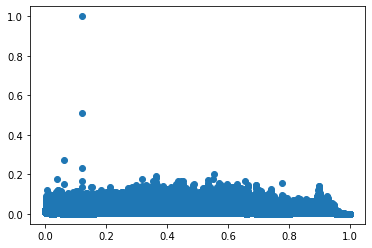

In [12]:
## MinMax Scalar:
plt.scatter(dfmm[0], dfmm[6])

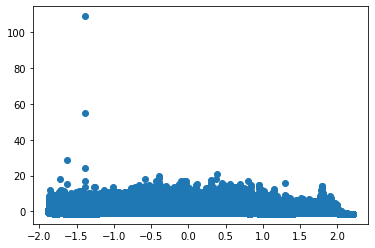

In [13]:
## Standard Scaler: 
plt.scatter(dfss[0], dfss[6])

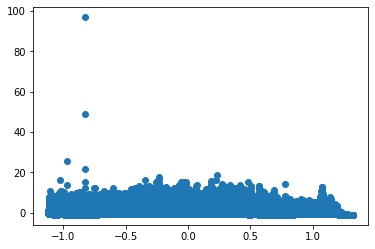

In [14]:
## Robust Scaler
plt.scatter(dfrs[0], dfrs[6])

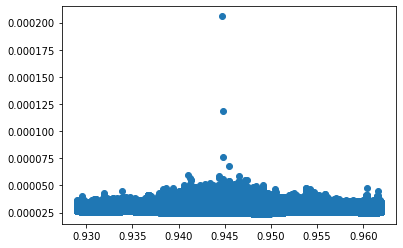

In [15]:
## Normalization: 
plt.scatter(dfnm[0], dfnm[6])

##### Evaluation: 
Apart from Normalization - the scalars give similar results, both visually and using base statistics.   
However, this highlights the outliers that need to be removed.   
The group descided to move forward with MinMax scaler. 

##### Visual look at Min-Max in comparison to column 2-5 (scaled pollution parameters )

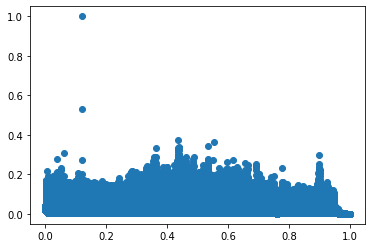

In [16]:
plt.scatter(dfmm[0], dfmm[2])

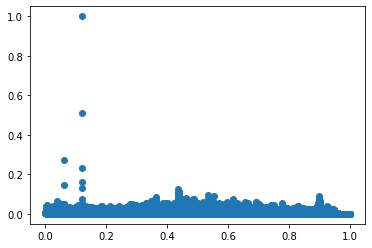

In [17]:
plt.scatter(dfmm[0], dfmm[3])

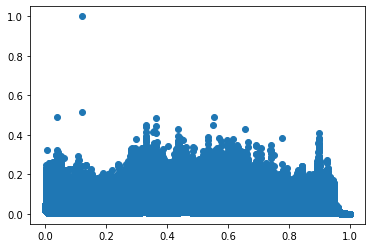

In [18]:
plt.scatter(dfmm[0], dfmm[4])

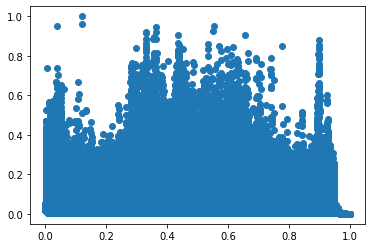

In [19]:
plt.scatter(dfmm[0], dfmm[5])

### 3. Outliers  
Before scaling of the data - it is important to remove the outliers. 

In [20]:
df.sort_values(by=['PM25'])

,x,y,NO,NOx,PM10,PM10d,PM25
5856421,561960,185260,19.10556,23.36314,21.62767,5.482214,14.03142
5856408,561940,185320,19.09822,23.34954,21.62858,5.483685,14.03147
5856420,561960,185240,19.11486,23.37959,21.62838,5.483369,14.03202
5856407,561940,185300,19.10708,23.36366,21.62929,5.484836,14.03206
5856392,561920,185360,19.09980,23.35280,21.63015,5.486232,14.03208
...,...,...,...,...,...,...,...
3607896,534920,192280,245.15350,875.36010,69.32650,191.395100,33.79229
557034,508740,175340,188.70770,2171.12800,45.14111,105.055300,36.63027
201314,505200,175260,212.16410,2541.88100,49.18314,128.828900,40.61438
559283,508760,176380,351.63420,4706.76800,72.18203,194.143600,63.60859


In [21]:
df.sort_values(by=['NO'])

,x,y,NO,NOx,PM10,PM10d,PM25
5856408,561940,185320,19.09822,23.34954,21.62858,5.483685,14.03147
5856392,561920,185360,19.09980,23.35280,21.63015,5.486232,14.03208
5856421,561960,185260,19.10556,23.36314,21.62767,5.482214,14.03142
5856407,561940,185300,19.10708,23.36366,21.62929,5.484836,14.03206
5856391,561920,185340,19.10859,23.36634,21.63086,5.487397,14.03268
...,...,...,...,...,...,...,...
3476658,533820,180780,234.12280,893.09050,59.83199,173.695500,30.74315
3607896,534920,192280,245.15350,875.36010,69.32650,191.395100,33.79229
2771796,527900,180980,253.88850,1161.78000,63.63592,182.762200,28.82191
559283,508760,176380,351.63420,4706.76800,72.18203,194.143600,63.60859


In [22]:
df.max()

x        561980.0000
y        203440.0000
NO          643.0457
NOx        9237.6180
PM10        119.3994
PM10d       201.4077
PM25        110.8271
dtype: float64

##### Initially, the data was to be trimmed by just removing the most extreme outliers. 

In [23]:
print(df.shape)
df_trim = df.drop([df.index[559283], df.index[557086]])
print(df_trim.shape)


(5856428, 7)
(5856426, 7)


In [24]:
df_trim.to_csv('all_col_df_with_outliers_dropped.csv')

In [25]:
mmscaler.fit(df_trim)
mm = mmscaler.transform(df_trim)

dfmm = pd.DataFrame(mm)
                    
print(dfmm.iloc[::500000, :])

                0         1         2         3         4         5         6
0        0.000000  0.356947  0.052051  0.010271  0.044320  0.020541  0.032769
500000   0.111699  0.269667  0.022793  0.003669  0.022118  0.009718  0.022625
1000000  0.185063  0.265753  0.026315  0.004242  0.024931  0.011029  0.025486
1500000  0.259088  0.530724  0.060849  0.011234  0.061191  0.029535  0.062708
2000000  0.329478  0.448924  0.063222  0.012066  0.062723  0.030386  0.064106
2500000  0.398876  0.735812  0.065429  0.012651  0.065362  0.031866  0.062894
3000000  0.468936  0.594129  0.137857  0.029863  0.136739  0.079038  0.144733
3500000  0.538004  0.382387  0.065743  0.012438  0.067970  0.033346  0.067085
4000000  0.608063  0.282975  0.036521  0.006146  0.038959  0.017826  0.041196
4500000  0.679775  0.418395  0.047891  0.008330  0.051492  0.024281  0.053468
5000000  0.751818  0.411742  0.036356  0.006121  0.038791  0.017741  0.039610
5500000  0.835757  0.740117  0.024756  0.004434  0.026425  0.011

In [26]:
dfmm.describe()

,0,1,2,3,4,5,6
count,5.856426e+06,5.856426e+06,5.856426e+06,5.856426e+06,5.856426e+06,5.856426e+06,5.856426e+06
mean,4.599995e-01,5.127668e-01,4.944210e-02,9.726796e-03,4.895023e-02,2.488362e-02,4.681970e-02
std,2.448449e-01,2.527252e-01,3.805739e-02,9.716800e-03,3.830596e-02,2.861282e-02,3.295544e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.538004e-01,3.045010e-01,2.504580e-02,4.292868e-03,2.470384e-02,1.092238e-02,2.353547e-02
50%,4.590218e-01,5.205479e-01,4.167253e-02,7.606748e-03,4.089899e-02,1.880056e-02,4.015580e-02
75%,6.642432e-01,7.248532e-01,6.192347e-02,1.179204e-02,6.136670e-02,2.963274e-02,6.067910e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


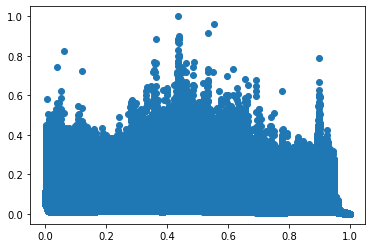

In [27]:
plt.scatter(dfmm[0], dfmm[2])

In [28]:
df.quantile([.001, .999], method="table", interpolation="nearest")

,x,y,NO,NOx,PM10,PM10d,PM25
0.001,501840,189640,41.99129,77.78530,25.38537,12.849320,15.38947
0.999,560420,187800,19.74995,24.40458,21.80499,5.772548,14.10396


In [29]:
dfmm.to_csv('MinMax_scaled_all_columns_outliers_dropped.csv')

##### Evaluation:  
This improved the data, but it was decided to use a more statistical method to remove the highest outliers


### 3a. Outlers Revisited

In [30]:
print(df.nlargest(n=5, columns=['NO']))
print(df.nlargest(n=5, columns=['NOx']))
print(df.nlargest(n=5, columns=['PM10']))
print(df.nlargest(n=5, columns=['PM10d']))
print(df.nlargest(n=5, columns=['PM25']))

              x       y        NO        NOx       PM10     PM10d       PM25
557086   508740  176380  643.0457  9237.6180  119.39940  201.4077  110.82710
559283   508760  176380  351.6342  4706.7680   72.18203  194.1436   63.60859
2771796  527900  180980  253.8885  1161.7800   63.63592  182.7622   28.82191
3607896  534920  192280  245.1535   875.3601   69.32650  191.3951   33.79229
3476658  533820  180780  234.1228   893.0905   59.83199  173.6955   30.74315
             x       y        NO       NOx       PM10     PM10d       PM25
557086  508740  176380  643.0457  9237.618  119.39940  201.4077  110.82710
559283  508760  176380  351.6342  4706.768   72.18203  194.1436   63.60859
201314  505200  175260  212.1641  2541.881   49.18314  128.8289   40.61438
557034  508740  175340  188.7077  2171.128   45.14111  105.0553   36.63027
561482  508780  176380  145.1047  1495.701   38.71870   66.3632   30.14410
              x       y        NO        NOx       PM10     PM10d       PM25
557086   50

In [32]:
des = df.describe()
print(des)

                  x             y            NO           NOx          PM10  \
count  5.856428e+06  5.856428e+06  5.856428e+06  5.856428e+06  5.856428e+06   
mean   5.292992e+05  1.785424e+05  3.070690e+01  4.784915e+01  2.396516e+01   
std    1.481801e+04  1.291426e+04  8.940069e+00  2.483966e+01  1.829711e+00   
min    5.014600e+05  1.523400e+05  1.909822e+01  2.334954e+01  2.162767e+01   
25%    5.168200e+05  1.679000e+05  2.497873e+01  3.416127e+01  2.280733e+01   
50%    5.292400e+05  1.789400e+05  2.888253e+01  4.250738e+01  2.358067e+01   
75%    5.416600e+05  1.893800e+05  3.363725e+01  5.304817e+01  2.455804e+01   
max    5.619800e+05  2.034400e+05  6.430457e+02  9.237618e+03  1.193994e+02   

              PM10d          PM25  
count  5.856428e+06  5.856428e+06  
mean   1.010993e+01  1.527605e+01  
std    5.322309e+00  8.771697e-01  
min    5.482214e+00  1.403142e+01  
25%    7.513471e+00  1.465707e+01  
50%    8.978596e+00  1.509888e+01  
75%    1.099307e+01  1.564445e+01  


In [33]:
## Identify 5 sd above the mean. Increase the multiples of sd to increase range: 
col_names = ['x', 'y', 'NO', 'NOx', 'PM10', 'PM10d', 'PM25']
b=[]
for i in col_names:
    a = des.at['mean', i ] + 5*(des.at['std', i])
    b.append(a)

print(b)

[603389.2264745464, 243113.66140649834, 75.40725149010191, 172.04742235004684, 33.11371285125291, 36.72147670155739, 19.66189911955984]


In [35]:
## Drop values above the 5sd threshold
df2 = df[ (df['NO'] < b[2]) & (df['NOx'] < b[3]) & (df['PM10'] < b[4]) & (df['PM10d'] < b[5]) & (df['PM25'] < b[6])]
print(df.shape)
print(df2.shape)

(5856428, 7)
(5807686, 7)


This method drops 48742 rows from the highest values.   
This is too many for our needs.   
If we plot the distribution of the NO attribute before and after the dropped rows, we can see the effect on the data.

<AxesSubplot: ylabel='Density'>

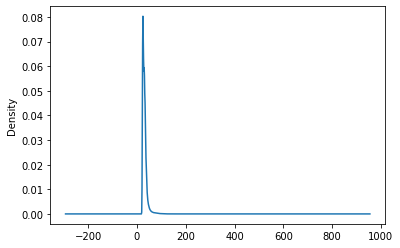

In [36]:
df['NO'].plot(kind='kde')

<AxesSubplot: ylabel='Density'>

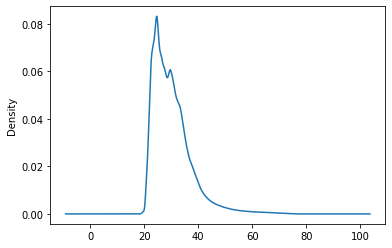

In [37]:
df2['NO'].plot(kind='kde')

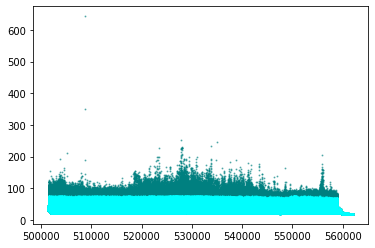

In [38]:
plt.scatter(df['x'], df['NO'], color = 'teal',alpha=0.5, s=1 )
plt.scatter(df2['x'], df2['NO'], color='aqua',alpha=0.5, s=1)
plt.show()

Evaluation: This is too much data to lose. It would appear that we are losing more high values that just outliers.   
We can repeat this for 7, 9 and 11 standard deviations. 


In [40]:
## Identify 7 sd above the mean. Increase the multiples of sd to increase range: 
a=[]
b=[]
for i in col_names:
    a = des.at['mean', i ] + 7*(des.at['std', i])
    b.append(a)

## Drop values above the 7sd threshold
df3 = df[ (df['NO'] < b[2]) & (df['NOx'] < b[3]) & (df['PM10'] < b[4]) & (df['PM10d'] < b[5]) & (df['PM25'] < b[6])]

In [41]:
## Calculate how many rows would be dropped: 
print(len(df. index) - len(df3. index))

25128


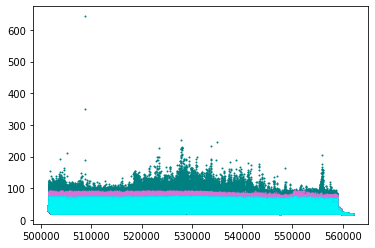

In [46]:
plt.scatter(df['x'], df['NO'], color = 'teal',alpha=1, s=1)
plt.scatter(df3['x'], df3['NO'], color='orchid',alpha=0.5, s=1)
plt.scatter(df2['x'], df2['NO'], color='aqua',alpha=0.1, s=1)
plt.show()

In [47]:
## Identify 9 sd above the mean. Increase the multiples of sd to increase range: 
a=[]
b=[]
for i in col_names:
    a = des.at['mean', i ] + 9*(des.at['std', i])
    b.append(a)

## Drop values above the 9sd threshold
df4 = df[ (df['NO'] < b[2]) & (df['NOx'] < b[3]) & (df['PM10'] < b[4]) & (df['PM10d'] < b[5]) & (df['PM25'] < b[6])]

In [48]:
## Calculate how many rows would be dropped: 
print(len(df. index) - len(df4. index))

13040


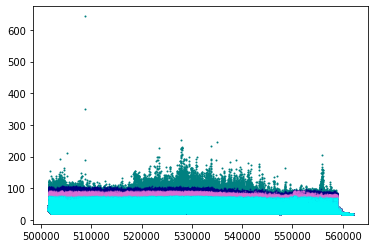

In [49]:
plt.scatter(df['x'], df['NO'], color = 'teal',alpha=1, s=1)
plt.scatter(df4['x'], df4['NO'], color='navy',alpha=0.5, s=1)
plt.scatter(df3['x'], df3['NO'], color='orchid',alpha=0.3, s=1)
plt.scatter(df2['x'], df2['NO'], color='aqua',alpha=0.1, s=1)
plt.show()

In [50]:
## Identify 11 sd above the mean. Increase the multiples of sd to increase range: 
a=[]
b=[]
for i in col_names:
    a = des.at['mean', i ] + 11*(des.at['std', i])
    b.append(a)

## Drop values above the 11sd threshold
df5 = df[ (df['NO'] < b[2]) & (df['NOx'] < b[3]) & (df['PM10'] < b[4]) & (df['PM10d'] < b[5]) & (df['PM25'] < b[6])]

In [51]:
## Calculate how many rows would be dropped: 
print(len(df. index) - len(df5. index))

7229


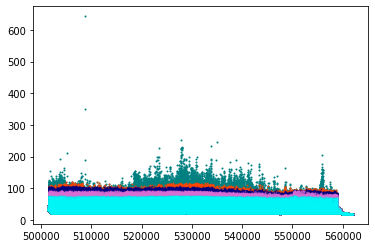

In [52]:
plt.scatter(df['x'], df['NO'], color = 'teal',alpha=1, s=1)
plt.scatter(df5['x'], df5['NO'], color='orangered',alpha=0.7, s=1)
plt.scatter(df4['x'], df4['NO'], color='navy',alpha=0.5, s=1)
plt.scatter(df3['x'], df3['NO'], color='orchid',alpha=0.3, s=1)
plt.scatter(df2['x'], df2['NO'], color='aqua',alpha=0.1, s=1)
plt.show()

Evaluation: Removing everything above 11 standard deviations for each attribute, drops around 0.125% of the rows.   
This is an ideal place to output the data to a csv file.   

In [116]:
df5.reset_index(drop=True, inplace=True)
df5

,x,y,NO,NOx,PM10,PM10d,PM25
0,501460,170580,31.31919,49.21837,23.74403,9.302350,14.90253
1,501460,170600,31.55455,49.78666,23.78645,9.387261,14.91900
2,501460,170620,31.79392,50.36728,23.82961,9.473991,14.93577
3,501460,170640,32.03141,50.94635,23.87249,9.560539,14.95249
4,501460,170660,32.26324,51.51179,23.91457,9.645805,14.96894
...,...,...,...,...,...,...,...
5849194,561980,185040,19.17837,23.47701,21.63205,5.489326,14.03577
5849195,561980,185060,19.17087,23.46760,21.63140,5.488270,14.03523
5849196,561980,185080,19.16383,23.46071,21.63077,5.487242,14.03471
5849197,561980,185100,19.15805,23.45906,21.63017,5.486267,14.03422


In [117]:
df5.to_csv('all_columns_with_11sd_dropped.csv')

### 4. Scaling and PCA Testing 

In [81]:
# Clearing out memory by deleting excess dataframes 
del df
del df2
del df3 
del df4
del df5

NameError: name 'df' is not defined

In [118]:
### Read in dataset that is already scaled and has outliers dropped.  
df = pd.read_csv("all_columns_with_11sd_dropped.csv",header=0, names = col_names)
df.head()

,x,y,NO,NOx,PM10,PM10d,PM25
0,501460,170580,31.31919,49.21837,23.74403,9.302350,14.90253
1,501460,170600,31.55455,49.78666,23.78645,9.387261,14.91900
2,501460,170620,31.79392,50.36728,23.82961,9.473991,14.93577
3,501460,170640,32.03141,50.94635,23.87249,9.560539,14.95249
4,501460,170660,32.26324,51.51179,23.91457,9.645805,14.96894


### 4a. PCA Testing 

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [120]:
## Seperate the x-y values from the concentrations....
## Treat x-y as our input variables:  
Y = df[['x','y']].copy()
X = df[['NO','NOx', 'PM10', 'PM10d', 'PM25']].copy()

In [121]:
### Calculate the variance for each number of PCA principle components:
def get_variance(X, n):
    scaler = StandardScaler()
    pca = PCA(n_components=n)
    pca.fit(scaler.fit_transform(X))
    return pca.explained_variance_ratio_.cumsum()[-1:]

In [122]:
## Print the cumilative variance across all 5 PCs 
for i in range(1,6):
    print('Components:\t', i, '=\t', get_variance(X, i), 
          '\tCumulative Variance')

Components:	 1 =	 [0.96731903] 	Cumulative Variance
Components:	 2 =	 [0.98903792] 	Cumulative Variance
Components:	 3 =	 [0.99771668] 	Cumulative Variance
Components:	 4 =	 [0.99952792] 	Cumulative Variance
Components:	 5 =	 [1.] 	Cumulative Variance


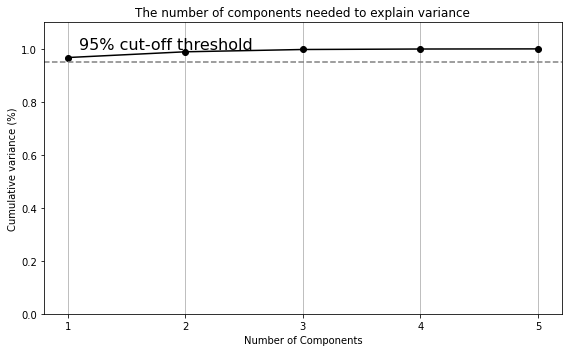

In [123]:
### Show this informaion in graphical form - with a 95% cutoff

scaler = StandardScaler()
data_rescaled = scaler.fit_transform(X)

pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (8,5)

fig, ax = plt.subplots()
xi = np.arange(1, 6, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 6, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='grey', linestyle='--')
plt.text(1.1, 1, '95% cut-off threshold', color = 'black', fontsize=16)

ax.grid(axis='x')
plt.tight_layout()
plt.savefig('pcavisualize_1.png', dpi=300)
plt.show()


Evaluation: This suggests that all the attributes could be accurately represented by 1 PC

In [124]:
### Define function for the PCA fit and inverse transform: 
def transform_pca(X, n):

    pca = PCA(n_components=n)
    pca.fit(X)
    X_new = pca.inverse_transform(pca.transform(X))

    return X_new


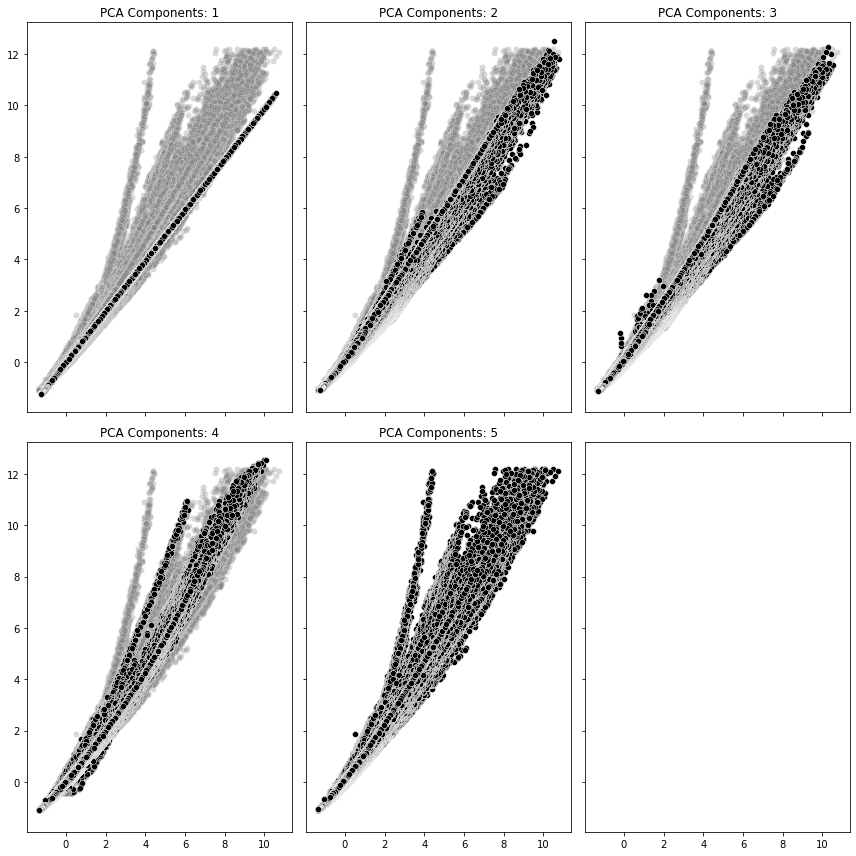

In [100]:
## Define view parameters
rows = 2
cols = 3
comps = 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(rows, 
                         cols, 
                         figsize=(12,12), 
                         sharex=True, 
                         sharey=True)

# Scatter of PCA (Black) and original (grey)  
for row in range(rows):
    for col in range(cols):
        try:
            X_new = transform_pca(X_scaled, comps)
            ax = sns.scatterplot(x=X_scaled[:, 0], 
                                 y=X_scaled[:, 1], 
                                 ax=axes[row, col], 
                                 color='grey', 
                                 alpha=.3)
            ax = sns.scatterplot(x=X_new[:, 0], 
                                 y=X_new[:, 1], 
                                 ax=axes[row, col], 
                                 color='black')
            ax.set_title(f'PCA Components: {comps}');

            comps += 1
        except:
            pass
plt.tight_layout()
plt.savefig('pcavisualize_2.png', dpi=300)

"With just one component displayed, it takes the form of a set of points projected on a line that goes is along the axis with the most variance in the original data.     
As more and more components are added, we can see how the data starts to resemble the original data even though there is less information being displayed. "

Evaluation: These displays suggect that the different pollution attributes display a high correlation, suggesting that when pollution is present it takes all five forms.   
This allows us to use 1 principle component to represent the data.  

### 4b. MinMax Scaling

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
mmscaler = MinMaxScaler()
mmscaler.fit(X)
mm = mmscaler.transform(X)

dfmm = pd.DataFrame(mm)
                    
print(dfmm.iloc[::500000, :])

                0         1         2         3         4
0        0.119574  0.086907  0.120990  0.060475  0.080162
500000   0.080640  0.049645  0.092279  0.044972  0.082821
1000000  0.112338  0.078616  0.128060  0.064409  0.115348
1500000  0.034723  0.020671  0.041344  0.019266  0.035480
2000000  0.105450  0.074330  0.122555  0.061341  0.108332
2500000  0.053274  0.031375  0.068040  0.032459  0.055018
3000000  0.132863  0.089057  0.165417  0.085982  0.156141
3500000  0.192885  0.134826  0.255295  0.143610  0.254721
4000000  0.115852  0.081441  0.138385  0.070238  0.125463
4500000  0.111065  0.076950  0.134404  0.067978  0.120611
5000000  0.103054  0.066950  0.131101  0.066115  0.119222
5500000  0.100903  0.076769  0.102327  0.050312  0.094723


In [127]:
dfmm_cols = ['NO','NOx', 'PM10', 'PM10d', 'PM25']
dfmm.columns = dfmm_cols

print(dfmm.head())
print(dfmm.shape)

         NO       NOx      PM10     PM10d      PM25
0  0.119574  0.086907  0.120990  0.060475  0.080162
1  0.121876  0.088816  0.123415  0.061819  0.081678
2  0.124219  0.090766  0.125883  0.063192  0.083221
3  0.126542  0.092712  0.128334  0.064562  0.084760
4  0.128810  0.094611  0.130740  0.065912  0.086273
(5849199, 5)


### 4c. PCA Application - 1 Component

In [128]:
## 1 Component PCA on the pollution attributes 
pca = PCA(n_components=1)
pca.fit(dfmm)
pca1dfmm = pca.transform(dfmm)
print("Original shape: {}".format(str(dfmm.shape)))
print("Reduced shape: {}".format(str(pca1dfmm.shape)))

Original shape: (5849199, 5)
Reduced shape: (5849199, 1)


In [129]:
## Convert to df
dfmm_pca1 = pd.DataFrame(pca1dfmm)
dfmm_pca1.head()

,0
0,-0.018991
1,-0.014677
2,-0.010282
3,-0.005910
4,-0.001625


### 4d Checking the correlation between Pollution Attributes and PC1

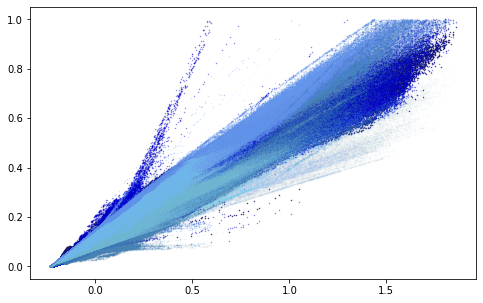

In [130]:
plt.scatter(dfmm_pca1[0], dfmm['NO'], color = 'midnightblue', s=0.2)
plt.scatter(dfmm_pca1[0], dfmm['NOx'], color = 'mediumblue', alpha=0.5, s=0.2)
plt.scatter(dfmm_pca1[0], dfmm['PM10'], color = 'cornflowerblue',alpha=0.3, s=0.2)
plt.scatter(dfmm_pca1[0], dfmm['PM10d'], color = 'steelblue',alpha=0.1, s=0.2)
plt.scatter(dfmm_pca1[0], dfmm['PM25'], color = 'skyblue', alpha=0.05, s=0.2)


### 4e Setting up Data for Output to Cluster Algorithm testing: 

In [132]:
## Y = df[['x','y']].copy()
df2 = df[['x','y']].copy()
df2['PC1'] = dfmm_pca1[0]
print(df2)
#print(dfmm_pca1)

              x       y       PC1
0        501460  170580 -0.018991
1        501460  170600 -0.014677
2        501460  170620 -0.010282
3        501460  170640 -0.005910
4        501460  170660 -0.001625
...         ...     ...       ...
5849194  561980  185040 -0.231353
5849195  561980  185060 -0.231447
5849196  561980  185080 -0.231534
5849197  561980  185100 -0.231605
5849198  561980  185120 -0.231607

[5849199 rows x 3 columns]


In [134]:
mmscaler = MinMaxScaler()
mmscaler.fit(Y)
mmy = mmscaler.transform(Y)

df3 = pd.DataFrame(mmy)
df3['PC1'] = dfmm_pca1[0]
                  
print(df3.iloc[::500000, :])

                0         1       PC1
0        0.000000  0.356947 -0.018991
500000   0.111699  0.606654 -0.072733
1000000  0.185063  0.647750 -0.005729
1500000  0.259088  0.936595 -0.163086
2000000  0.329808  0.228963 -0.017756
2500000  0.399207  0.909980 -0.122407
3000000  0.469597  0.334247  0.053640
3500000  0.538665  0.541683  0.212285
4000000  0.608724  0.775734  0.009130
4500000  0.680767  0.293933  0.000025
5000000  0.752809  0.502935 -0.010866
5500000  0.837409  0.436008 -0.039780


In [135]:
df3.columns = ['x', 'y', 'PC1']
df3.head()

,x,y,PC1
0,0.0,0.356947,-0.018991
1,0.0,0.357339,-0.014677
2,0.0,0.357730,-0.010282
3,0.0,0.358121,-0.005910
4,0.0,0.358513,-0.001625


Final QC of PC1 Data on heatmaps

<ipython-input-140-745a229bf842>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df2piv = df2.pivot("y", "x", "PC1")


<AxesSubplot: xlabel='x', ylabel='y'>

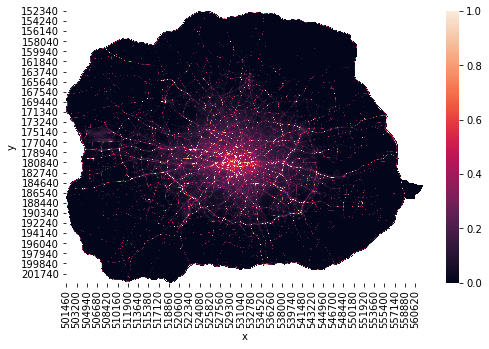

In [140]:
df2piv = df2.pivot("y", "x", "PC1")
sns.heatmap(df2piv, vmin =0, vmax= 1)

<ipython-input-139-63367a4e62c9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df3piv = df3.pivot("y", "x", "PC1")


<AxesSubplot: xlabel='x', ylabel='y'>

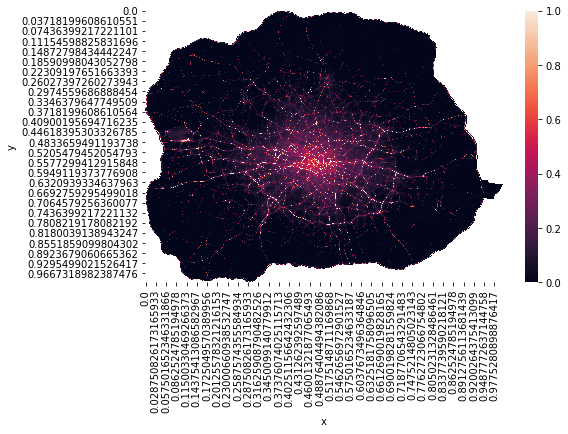

In [139]:
df3piv = df3.pivot("y", "x", "PC1")
sns.heatmap(df3piv, vmin =0, vmax= 1)

In [138]:
### Output PCA files to csv:
df2.to_csv('PC1_with_X_Y.csv')
df3.to_csv('PC1_with_scaled_X_Y.csv')